### 01 데이터 처리(1)
#### 결측치(missing value) 및 이상치(outlier) 처리

### 학습 내용
* 결측치에 대해 알아본다.
* 결측치를 찾고 이에 사용한 연산을 알아본다.
* 결측치를 대체하는 것에 대해 알아본다.
* 이상치에 대해 알아본다.

### 01 결측값(Missing Value)이란?
* 결측치는 누락된 값, 비어 있는 값을 의미한다.
* 결측치가 있으면 함수 적용이 안되거나 분석 결과가 왜곡되는 현상이 있을 수 있다.


In [169]:
df <- data.frame(Pclass = c(1, 2, 3, NA, 1), 
                 Embarked = c("C", "S", "Q", NA, NA), 
                 Fare = c(NA,150,200, 300, 100))
df

Pclass,Embarked,Fare
1,C,NA
2,S,150
3,Q,200
NA,NA,300
1,NA,100


### R Stuido 출력결과
```
  Pclass Embarked Fare
1      1        C   NA
2      2        S  150
3      3        Q  200
4     NA     <NA>  300
5      1     <NA>  100
```

* 문자에서는 < >로 둘러싸여 있음.
* 숫자에서는 NA로 되어 있음.

### 결측치 확인하기 - is.na(데이터셋)

In [170]:
is.na(df)

Pclass,Embarked,Fare
FALSE,FALSE,TRUE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
TRUE,TRUE,FALSE
FALSE,TRUE,FALSE


### 결측치의 개수 확인

In [171]:
table(is.na(df))

## PClass 결측치 확인
table(is.na(df$Pclass))

## EMbarked 결측치 확인
table(is.na(df$Embarked))

## Fare 결측치 확인
table(is.na(df$Fare))


FALSE  TRUE 
   11     4 


FALSE  TRUE 
    4     1 


FALSE  TRUE 
    3     2 


FALSE  TRUE 
    4     1 

### 왜 결측치 처리를 해야 하나?
* 결측치가 포함되면 데이터는 정상적인 연산이 안되고 NA가 출력

In [172]:
mean(df$Pclass)
mean(df$Fare)

[1] NA

[1] NA

### 결측치가 제거된 행만 가져오기

In [173]:
library(dplyr)
df %>% filter(!is.na(Pclass))

Pclass,Embarked,Fare
1,C,NA
2,S,150
3,Q,200
1,NA,100


In [174]:
library(dplyr)
df %>% filter(!is.na(Pclass) & !is.na(Embarked))

Pclass,Embarked,Fare
1,C,NA
2,S,150
3,Q,200


### 결측치가 하나라도 있으면 제거.
* na.omit(df) : 결측치가 하나라도 있으면 제거되지만, 분석에 필요한 정보까지 삭제됨.

In [175]:
df_no <- na.omit(df)
df_no

,Pclass,Embarked,Fare
2,2,S,150
3,3,Q,200


### 결측치를 제외하고 연산 수행하기
* na.rm 파라미터 사용

In [176]:
df

Pclass,Embarked,Fare
1,C,NA
2,S,150
3,Q,200
NA,NA,300
1,NA,100


In [177]:
mean(df$Fare, na.rm=T)

[1] 187.5

### mtcars의 데이터 셋의 10행 mpg_part에 저장

In [178]:
mtcars[seq(1,10,1), ]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [179]:
1:5

[1] 1 2 3 4 5

In [180]:
mc_part <- mtcars[seq(1,10,1), 1:5]   # 1행부터 10행, 그리고 1열부터 5열까지
mc_part

,mpg,cyl,disp,hp,drat
Mazda RX4,21.0,6,160.0,110,3.90
Mazda RX4 Wag,21.0,6,160.0,110,3.90
Datsun 710,22.8,4,108.0,93,3.85
Hornet 4 Drive,21.4,6,258.0,110,3.08
Hornet Sportabout,18.7,8,360.0,175,3.15
Valiant,18.1,6,225.0,105,2.76
Duster 360,14.3,8,360.0,245,3.21
Merc 240D,24.4,4,146.7,62,3.69
Merc 230,22.8,4,140.8,95,3.92
Merc 280,19.2,6,167.6,123,3.92


### 결측치 적용

In [181]:
mc_part[c(4,8),'drat'] <- NA
mc_part

,mpg,cyl,disp,hp,drat
Mazda RX4,21.0,6,160.0,110,3.90
Mazda RX4 Wag,21.0,6,160.0,110,3.90
Datsun 710,22.8,4,108.0,93,3.85
Hornet 4 Drive,21.4,6,258.0,110,NA
Hornet Sportabout,18.7,8,360.0,175,3.15
Valiant,18.1,6,225.0,105,2.76
Duster 360,14.3,8,360.0,245,3.21
Merc 240D,24.4,4,146.7,62,NA
Merc 230,22.8,4,140.8,95,3.92
Merc 280,19.2,6,167.6,123,3.92


In [182]:
mc_part %>% summarise(mean_drat = mean(drat))

mean_drat
NA


### na.rm을 적용 후, 평균 구하기

In [183]:
mc_part %>% summarise(mean_drat = mean(drat, na.rm=T))

mean_drat
3.57625


In [184]:
mc_part %>% summarise(mean_drat = mean(drat, na.rm=T), 
                          sum_drat = sum(drat, na.rm=T),
                          med_drat = median(drat, na.rm=T))
mc_part

mean_drat,sum_drat,med_drat
3.57625,28.61,3.875


,mpg,cyl,disp,hp,drat
Mazda RX4,21.0,6,160.0,110,3.90
Mazda RX4 Wag,21.0,6,160.0,110,3.90
Datsun 710,22.8,4,108.0,93,3.85
Hornet 4 Drive,21.4,6,258.0,110,NA
Hornet Sportabout,18.7,8,360.0,175,3.15
Valiant,18.1,6,225.0,105,2.76
Duster 360,14.3,8,360.0,245,3.21
Merc 240D,24.4,4,146.7,62,NA
Merc 230,22.8,4,140.8,95,3.92
Merc 280,19.2,6,167.6,123,3.92


### drat 컬럼의 NA을 평균값을 대체하기

In [185]:
mean(mc_part$drat, na.rm=T)

[1] 3.57625

In [186]:
mc_part$drat <- ifelse(is.na(mc_part$drat), 3.57625, mc_part$drat )
mc_part
table(is.na(mc_part$drat) ) 

,mpg,cyl,disp,hp,drat
Mazda RX4,21.0,6,160.0,110,3.90000
Mazda RX4 Wag,21.0,6,160.0,110,3.90000
Datsun 710,22.8,4,108.0,93,3.85000
Hornet 4 Drive,21.4,6,258.0,110,3.57625
Hornet Sportabout,18.7,8,360.0,175,3.15000
Valiant,18.1,6,225.0,105,2.76000
Duster 360,14.3,8,360.0,245,3.21000
Merc 240D,24.4,4,146.7,62,3.57625
Merc 230,22.8,4,140.8,95,3.92000
Merc 280,19.2,6,167.6,123,3.92000



FALSE 
   10 

### (실습해보기) L1-1
* mpg 데이터 셋에 대해 결측치를 대해 만들고, 이에 대한 mean_mpg, sum_mpg, med_mpg을 구해보자
* 결측치를 중앙값으로 대체해 보자.

### 02 이상치 찾고, 이를 처리하기 

In [187]:
outlier <- data.frame(Pclass=c(1,2,3,4,55,3,1,1,2), family=c(1,2,3,1,2,3,1,1,1))
outlier

Pclass,family
1,1
2,2
3,3
4,1
55,2
3,3
1,1
1,1
2,1


In [188]:
library(ggplot2)

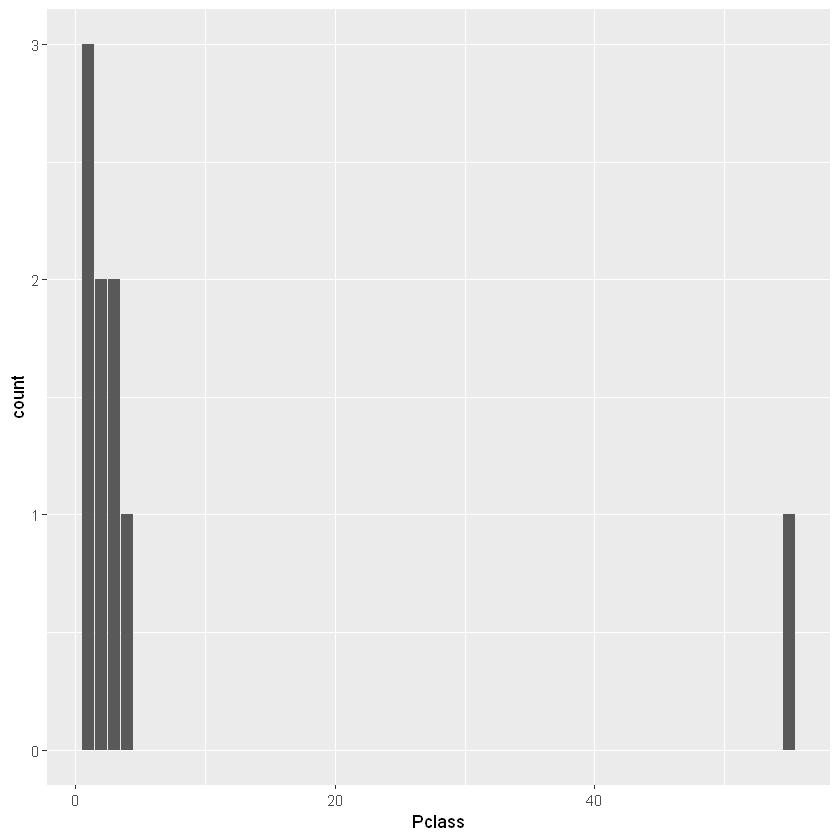

In [189]:
ggplot(outlier, aes(x=Pclass)) + geom_bar()

In [190]:
outlier$Pclass %in% c(1,2,3)

[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE

In [191]:
# install.packages("Hmisc")  # 설치는 한번만, 설치 후, 이 행은 주석처리

In [192]:
library(Hmisc)

In [193]:
# ?Negate

In [194]:
`%notin%` <- Negate(`%in%`)

In [195]:
outlier$Pclass %in% c(1,2,3)

[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE

In [196]:
## outlier
outlier[outlier$Pclass %notin% c(1,2,3),  ]

,Pclass,family
4,4,1
5,55,2


In [197]:
table(outlier$Pclass)


 1  2  3  4 55 
 3  2  2  1  1 

### 아래 내용 참고, 다음과 같이 최빈값 확인 가능.

```
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)  # 유일한 값.
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


# Calculate the mode using the user function.
result <- getmode(outlier$Pclass)
print(result)

```

In [198]:
## outlier
outlier[outlier$Pclass %notin% c(1,2,3), 'Pclass' ] = 1
outlier[c(4,5),]   # 아까 행 4,5행 확인
outlier

,Pclass,family
4,1,1
5,1,2


Pclass,family
1,1
2,2
3,3
1,1
1,2
3,3
1,1
1,1
2,1


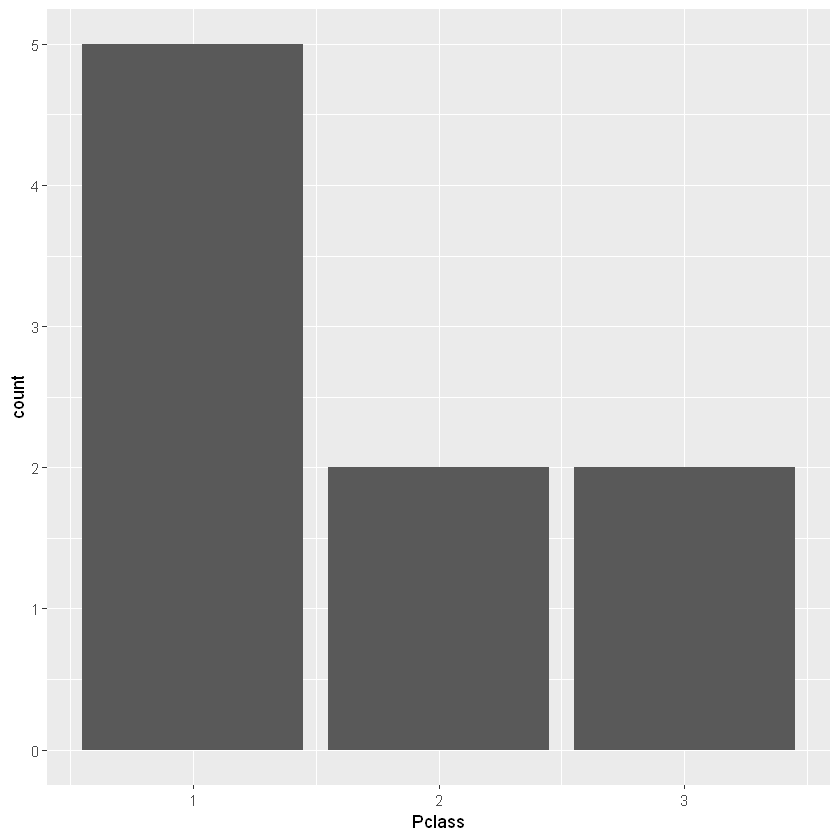

In [199]:
ggplot(outlier, aes(x=Pclass)) + geom_bar()

### (실습해 보기) 
* mpg 데이터 셋의 일부인 mc_part의 cyl에 4,8행에 이상치 50을 만들자.
* 이 결측치를 중앙값으로 처리 후, 이를 다시 그래프를 통해 확인해 보자.

### (더해보기)
* 타이타닉 데이터 셋을 결측치 처리를 해보자.

### REF
* %notin% : https://www.r-bloggers.com/the-notin-operator/